In [1]:
from sklearn import preprocessing
import numpy as np
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [4]:
with open ('genomic_regions') as fh:
    for line in fh:
        columns = line.strip().split('\t')
        #print(columns)
        print(columns[0], columns[7], columns[13], columns[3], columns[14], columns[9], columns[8], columns[4], columns[10],columns[16], columns[11], columns[1], columns[6], columns[2], columns[5], columns[15], columns[12], sep = '\t')        
        

Regions	ApC_ratio	ApT_ratio	ApG_ratio	TpA_ratio	CpC_ratio	GpT_ratio	CpT_ratio	GpG_ratio	GpC_ratio	ApA_ratio	TpG_ratio	TpC_ratio	CpA_ratio	GpA_ratio	CpG_ratio	TpT_ratio
Exon	 0.84	 0.86	 1.23	 0.56	 0.85	 0.83	 1.22	 0.85	 0.99	0.78	 1.29	 1.08	 1.29	 1.07	 0.37	 0.78
Intron	 0.86	 0.85	 1.18	 0.74	 0.94	 0.84	 1.21	 0.99	 1.0	0.79	 1.22	 0.99	 1.2	 0.97	 0.22	 0.8
Promoter	 0.81	 0.83	 1.2	 0.69	 0.91	 0.81	 1.2	 0.91	 0.99	0.85	 1.15	 1.01	 1.15	 1.01	 0.39	 0.85
Intergenic	 0.81	 0.83	 1.23	 0.65	 0.95	 0.81	 1.23	 0.95	 0.98	0.82	 1.24	 0.99	 1.23	 0.99	 0.29	 0.82
CpG island	 0.79	 0.71	 1.25	 0.55	 0.76	 0.79	 1.25	 0.76	 1.03	0.94	 1.04	 1.06	 1.04	 1.07	 0.84	 0.95
CAGE cluster	 0.82	 0.78	 1.22	 0.62	 0.86	 0.82	 1.26	 0.93	 0.97	0.82	 1.21	 1.04	 1.26	 1.01	 0.31	 0.8
Cis_regulatory regions	 0.84	 0.81	 1.25	 0.65	 0.87	 0.84	 1.25	 0.87	 1.01	0.8	 1.26	 1.01	 1.26	 1.02	 0.23	 0.8
Conserved region	 0.74	 0.89	 1.05	 0.625	 0.92	 0.785	 1.12	 0.91	 1.02	0.885	 1.23	 1.03	 1.08

In [5]:
df = pd.read_table("genomic_regions", sep = '\t')
df

,Regions,TpG_ratio,CpA_ratio,ApG_ratio,CpT_ratio,GpA_ratio,TpC_ratio,ApC_ratio,GpT_ratio,CpC_ratio,GpG_ratio,ApA_ratio,TpT_ratio,ApT_ratio,TpA_ratio,CpG_ratio,GpC_ratio
0,Exon,1.29,1.29,1.23,1.22,1.07,1.08,0.84,0.830,0.85,0.85,0.780,0.78,0.86,0.560,0.37,0.99
1,Intron,1.22,1.20,1.18,1.21,0.97,0.99,0.86,0.840,0.94,0.99,0.790,0.80,0.85,0.740,0.22,1.00
2,Promoter,1.15,1.15,1.20,1.20,1.01,1.01,0.81,0.810,0.91,0.91,0.850,0.85,0.83,0.690,0.39,0.99
3,Intergenic,1.24,1.23,1.23,1.23,0.99,0.99,0.81,0.810,0.95,0.95,0.820,0.82,0.83,0.650,0.29,0.98
4,CpG island,1.04,1.04,1.25,1.25,1.07,1.06,0.79,0.790,0.76,0.76,0.940,0.95,0.71,0.550,0.84,1.03
5,CAGE cluster,1.21,1.26,1.22,1.26,1.01,1.04,0.82,0.820,0.86,0.93,0.820,0.80,0.78,0.620,0.31,0.97
6,Cis_regulatory regions,1.26,1.26,1.25,1.25,1.02,1.01,0.84,0.840,0.87,0.87,0.800,0.80,0.81,0.650,0.23,1.01
7,Conserved region,1.23,1.08,1.05,1.12,1.00,1.03,0.74,0.785,0.92,0.91,0.885,0.85,0.89,0.625,0.47,1.02
8,Enhancer region,1.23,1.23,1.18,1.18,0.99,0.99,0.81,0.820,0.93,0.93,0.820,0.82,0.85,0.690,0.24,1.04
9,Meotic region,1.21,1.21,1.19,1.21,1.02,1.00,0.86,0.830,0.96,0.97,0.800,0.79,0.86,0.720,0.22,0.94


In [6]:
non_numeric =['Regions']
species = df['Regions']
non_numeric

['Regions']

In [7]:
df_numeric = df.drop(non_numeric, axis = 1)
df_numeric

,TpG_ratio,CpA_ratio,ApG_ratio,CpT_ratio,GpA_ratio,TpC_ratio,ApC_ratio,GpT_ratio,CpC_ratio,GpG_ratio,ApA_ratio,TpT_ratio,ApT_ratio,TpA_ratio,CpG_ratio,GpC_ratio
0,1.29,1.29,1.23,1.22,1.07,1.08,0.84,0.830,0.85,0.85,0.780,0.78,0.86,0.560,0.37,0.99
1,1.22,1.20,1.18,1.21,0.97,0.99,0.86,0.840,0.94,0.99,0.790,0.80,0.85,0.740,0.22,1.00
2,1.15,1.15,1.20,1.20,1.01,1.01,0.81,0.810,0.91,0.91,0.850,0.85,0.83,0.690,0.39,0.99
3,1.24,1.23,1.23,1.23,0.99,0.99,0.81,0.810,0.95,0.95,0.820,0.82,0.83,0.650,0.29,0.98
4,1.04,1.04,1.25,1.25,1.07,1.06,0.79,0.790,0.76,0.76,0.940,0.95,0.71,0.550,0.84,1.03
5,1.21,1.26,1.22,1.26,1.01,1.04,0.82,0.820,0.86,0.93,0.820,0.80,0.78,0.620,0.31,0.97
6,1.26,1.26,1.25,1.25,1.02,1.01,0.84,0.840,0.87,0.87,0.800,0.80,0.81,0.650,0.23,1.01
7,1.23,1.08,1.05,1.12,1.00,1.03,0.74,0.785,0.92,0.91,0.885,0.85,0.89,0.625,0.47,1.02
8,1.23,1.23,1.18,1.18,0.99,0.99,0.81,0.820,0.93,0.93,0.820,0.82,0.85,0.690,0.24,1.04
9,1.21,1.21,1.19,1.21,1.02,1.00,0.86,0.830,0.96,0.97,0.800,0.79,0.86,0.720,0.22,0.94


<Figure size 2160x1296 with 0 Axes>

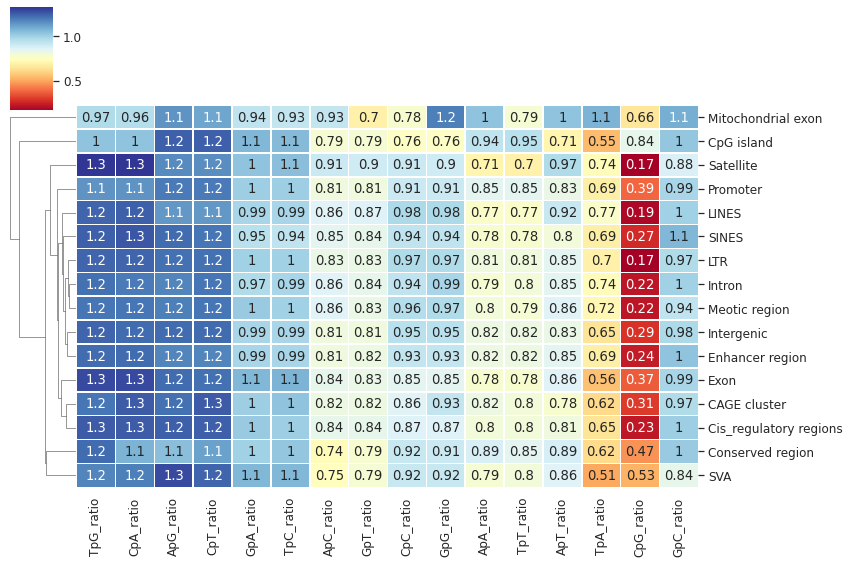

In [8]:

sns.set(font_scale = 1.1)
fig = plt.figure(figsize =(30,18))
sns.color_palette()
ax = sns.clustermap(df_numeric, figsize=(12, 8), dendrogram_ratio=(.1, .2), cmap="RdYlBu", col_cluster = False,yticklabels=species, linewidths=.5, annot=True)
#ax.set_title('Genomic Regions', size = 20)
plt.savefig('non_normalised_genomic_regions')